# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [1]:
# Ajoutez ici les imports de librairies nécessaires
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Commencez par recharger le jeu de données depuis un csv dans un dataframe Pandas. Rappel de l'adresse à laquelle vous pouvez le trouver : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
titanic_data = pd.read_csv("Titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

In [3]:
print("Nombre de données total : ", titanic_data.size)
print("Nombre de lignes : ", titanic_data.shape[0])
print("Nombre de colonnes : ", titanic_data.shape[1])

Nombre de données total :  10692
Nombre de lignes :  891
Nombre de colonnes :  12


2. Combien d'attributs compte le jeu de données ?

In [4]:
titanic_data.shape[1]

12

3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

In [5]:
titanic_data
print("Données discrètes : Survived, Pclass, Name, Sex, SibSp, Parch, Cabin, Embarked")
print("Données continues : Age, Fare")

Données discrètes : Survived, Pclass, Name, Sex, SibSp, Parch, Cabin, Embarked
Données continues : Age, Fare


4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

In [6]:
print("Les données quantitatives sont : PassengerId, Pclass, Age, SibSp, Parch, Fare")
print("Les données qualitatives sont : Survived, Name, Sex, Ticket, Cabin, Embarked")

Les données quantitatives sont : PassengerId, Pclass, Age, SibSp, Parch, Fare
Les données qualitatives sont : Survived, Name, Sex, Ticket, Cabin, Embarked


5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

In [7]:
quantitative_data = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
quantitative_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

Text(0.5, 0, 'Prix')

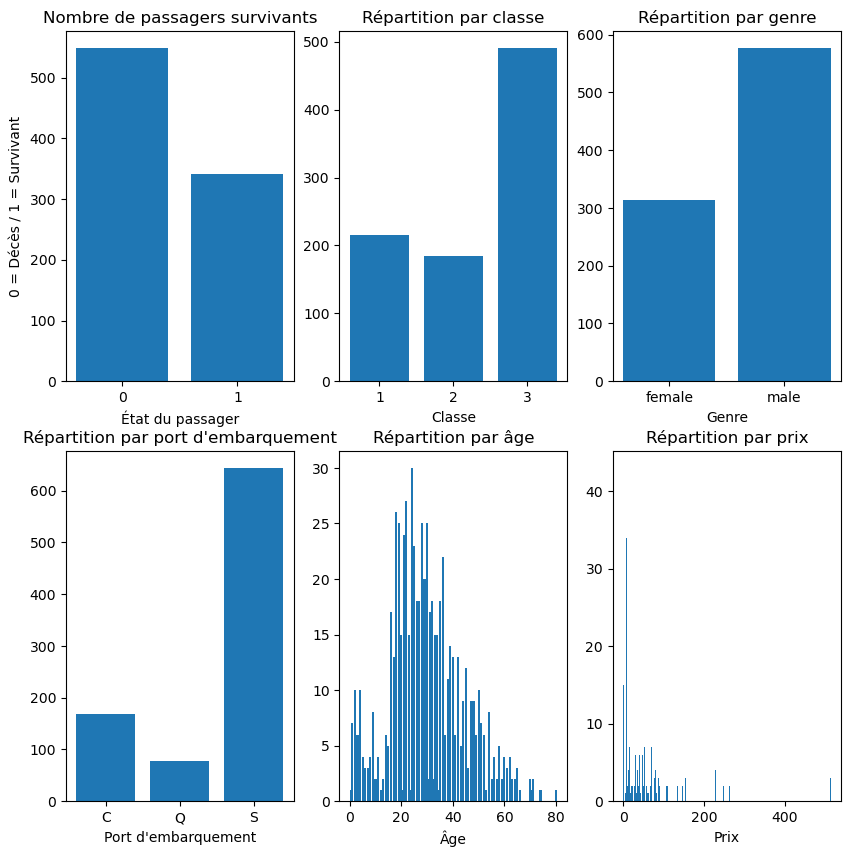

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))


survivor_counts_data = titanic_data.groupby(by='Survived')['PassengerId'].count()
sub00 = axes[0, 0] 
sub00.bar(survivor_counts_data.index.values, survivor_counts_data.values)
sub00.set_title("Nombre de passagers survivants")
sub00.set_xlabel("État du passager")
sub00.set_ylabel("0 = Décès / 1 = Survivant")
sub00.set_xticks(survivor_counts_data.index.values)

pclass_counts_data = titanic_data.groupby(by='Pclass')['PassengerId'].count()
sub01 = axes[0, 1]
sub01.bar(pclass_counts_data.index.values, pclass_counts_data.values)
sub01.set_title("Répartition par classe")
sub01.set_xlabel("Classe")
sub01.set_xticks(pclass_counts_data.index.values)

gender_counts_data = titanic_data.groupby(by='Sex')['PassengerId'].count()
sub02 = axes[0, 2]
sub02.bar(gender_counts_data.index.values, gender_counts_data.values)
sub02.set_title("Répartition par genre")
sub02.set_xlabel("Genre")
sub02.set_xticks(gender_counts_data.index.values)

embarked_counts_data = titanic_data.groupby(by='Embarked')['PassengerId'].count()
sub10 = axes[1, 0]
sub10.bar(embarked_counts_data.index.values, embarked_counts_data.values)
sub10.set_title("Répartition par port d'embarquement")
sub10.set_xlabel("Port d'embarquement")
sub10.set_xticks(embarked_counts_data.index.values)

age_counts_data = titanic_data.groupby(by='Age')['PassengerId'].count()
sub11 = axes[1, 1]
sub11.bar(age_counts_data.index.values, age_counts_data.values)
sub11.set_title("Répartition par âge")
sub11.set_xlabel("Âge")

fare_counts_data = titanic_data.groupby(by='Fare')['PassengerId'].count()
sub12 = axes[1, 2]
sub12.bar(fare_counts_data.index.values, fare_counts_data.values)
sub12.set_title("Répartition par prix")
sub12.set_xlabel("Prix")

7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

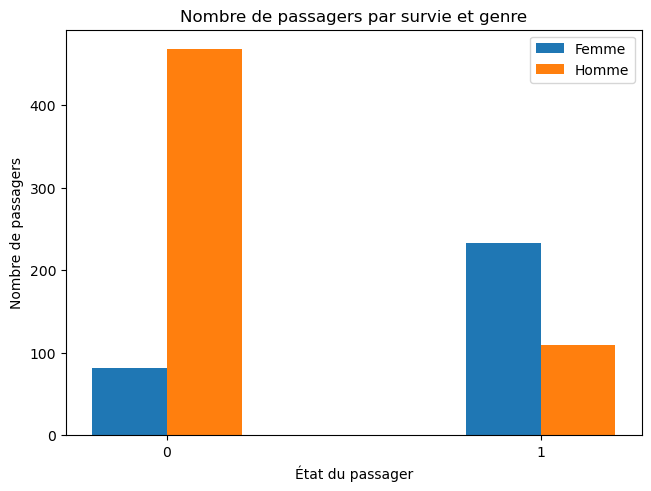

In [9]:
survived_indexes = titanic_data.groupby('Survived').count()[['PassengerId']].index
survived_female_values = titanic_data[titanic_data['Sex'] == 'female'].groupby('Survived').count()[['PassengerId']].values.flatten()
survived_male_values = titanic_data[titanic_data['Sex'] == 'male'].groupby('Survived').count()[['PassengerId']].values.flatten()

width = 0.20

fig, ax = plt.subplots(layout='constrained')

ax.bar(survived_indexes-width/2, survived_female_values, width, label='Femme')
ax.bar(survived_indexes+width/2, survived_male_values, width, label='Homme')

ax.set_xticks(survived_indexes)
ax.legend(loc='upper right')
    
plt.xlabel('État du passager')
plt.ylabel('Nombre de passagers')
plt.title('Nombre de passagers par survie et genre')

plt.show()

Il y a plus de personnes décédées chez les hommes. L'état du passager, à savoir s'il est mort ou vivant, nous donne donc une bonne indication sur son genre. Un premier lien peut donc surgir de cette statistique. Chez les survivants la distinction est moins importante, il faudra combiner avec d'autres champs pour pouvoir obtenir une information plus précise.

8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

<Axes: >

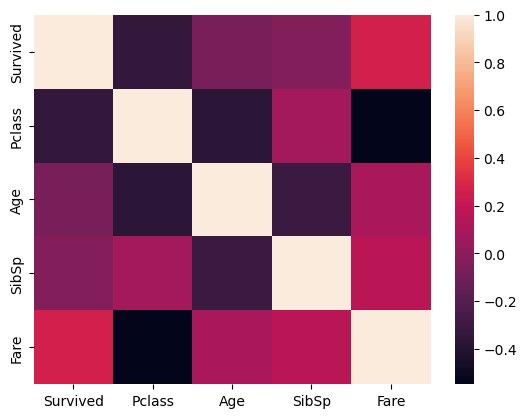

In [10]:
sns.heatmap(titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']].corr())

- Il y a une grande corrélation entre la classe et tarif du billet, ce qui est tout à fait logique car les billets en première classe sont plus chers qu'en troisième.
- Il y en a également une sur la survie et la classe du passager, ce qui est aussi cohérent car les personnes des classes supérieures ont du être évacuées en premier.
- Il y a une corrélation entre l'âge et la classe, ce qui apparaît également logique car les personnes âgées sont souvent plus aisées.
- Il y a aussi une légère corrélation est l'âge et le nombre de frères et soeurs, ce qui est encore logique car leur âge sont moins espacés qu'entre deux personnes inconnues. 

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

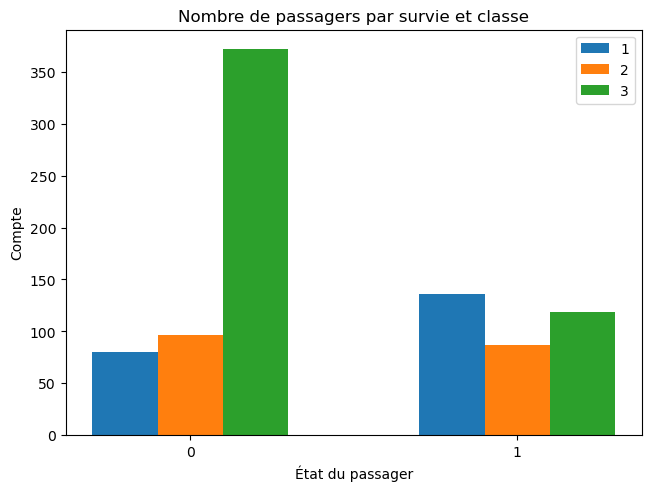

In [11]:
survived_indexes = titanic_data.groupby('Survived').count()[['PassengerId']].index
survived_pclass_1_values = titanic_data[titanic_data['Pclass'] == 1].groupby('Survived').count()[['PassengerId']].values.flatten()
survived_pclass_2_values = titanic_data[titanic_data['Pclass'] == 2].groupby('Survived').count()[['PassengerId']].values.flatten()
survived_pclass_3_values = titanic_data[titanic_data['Pclass'] == 3].groupby('Survived').count()[['PassengerId']].values.flatten()

width = 0.20

fig, ax = plt.subplots(layout='constrained')

ax.bar(survived_indexes-width, survived_pclass_1_values, width, label='1')
ax.bar(survived_indexes, survived_pclass_2_values, width, label='2')
ax.bar(survived_indexes+width, survived_pclass_3_values, width, label='3')

ax.set_xticks(survived_indexes)
ax.legend(loc='upper right')
    
plt.xlabel('État du passager')
plt.ylabel('Compte')
plt.title('Nombre de passagers par survie et classe')

plt.show()

Les passagers de classes moins élevées ont eu moins de chance de survie.

/home/quentin-eni/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

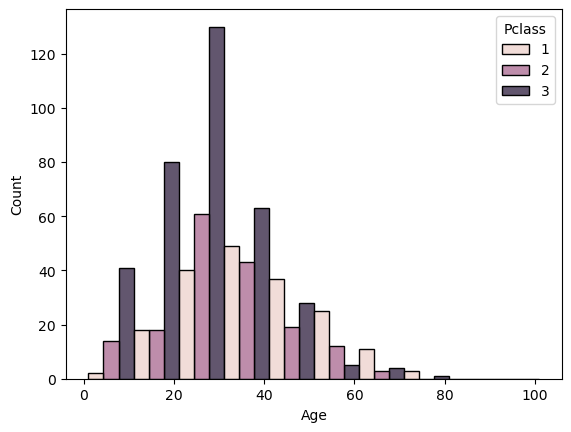

In [12]:
# Proposition 2 : âge et classe des passagers
sns.histplot(data=titanic_data, x='Age', hue='Pclass', multiple='dodge', bins=range(1, 110, 10))

Les passagers les plus âgés sont souvent dans les classes les plus aisées.

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

Il va falloir regarder la survie par classe d'âge, la survie par rapport au nombre de membres de la famille et l'âge par rapport au prix du ticket.

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

In [13]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

In [14]:
titanic_data[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

In [15]:
titanic_data['Embarked'] = titanic_data['Embarked'].replace(np.nan, 'U')
titanic_data[(titanic_data['PassengerId'] == 62) | (titanic_data['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,U
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,U


### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

In [16]:
titanic_data.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

In [17]:
titanic_data[['Age', 'Sex', 'Pclass']].groupby(by=['Sex', 'Pclass']).mean()

Age
Sex    Pclass           
female 1       34.611765
       2       28.722973
       3       21.750000
male   1       41.281386
       2       30.740707
       3       26.507589

6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

In [18]:
condition_sex_female_pclass_1 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 1)
mean_age_sex_female_pclass_1 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 1)]['Age'].mean()
titanic_data.loc[condition_sex_female_pclass_1, 'Age'] = mean_age_sex_female_pclass_1

condition_sex_female_pclass_2 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 2)
mean_age_sex_female_pclass_2 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 2)]['Age'].mean()
titanic_data.loc[condition_sex_female_pclass_2, 'Age'] = mean_age_sex_female_pclass_2

condition_sex_female_pclass_3 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 3)
mean_age_sex_female_pclass_3 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 3)]['Age'].mean()
titanic_data.loc[condition_sex_female_pclass_3, 'Age'] = mean_age_sex_female_pclass_3

condition_sex_male_pclass_1 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 1)
mean_age_sex_male_pclass_1 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 1)]['Age'].mean()
titanic_data.loc[condition_sex_male_pclass_1, 'Age'] = mean_age_sex_male_pclass_1

condition_sex_male_pclass_2 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 2)
mean_age_sex_male_pclass_2 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 2)]['Age'].mean()
titanic_data.loc[condition_sex_male_pclass_2, 'Age'] = mean_age_sex_male_pclass_2

condition_sex_male_pclass_3 = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 3)
mean_age_sex_male_pclass_3 = titanic_data[(titanic_data['Age'].notnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 3)]['Age'].mean()
titanic_data.loc[condition_sex_male_pclass_3, 'Age'] = mean_age_sex_male_pclass_3

## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

In [19]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

In [20]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,7.2500,NaN,S
1,1,1,female,38.00,1,0,71.2833,C85,C
2,1,3,female,26.00,0,0,7.9250,NaN,S
3,1,1,female,35.00,1,0,53.1000,C123,S
4,0,3,male,35.00,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,NaN,S
887,1,1,female,19.00,0,0,30.0000,B42,S
888,0,3,female,21.75,1,2,23.4500,NaN,S
889,1,1,male,26.00,0,0,30.0000,C148,C


3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

In [21]:
titanic_data['TotalPeople'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data = titanic_data.drop(['SibSp', 'Parch'], axis=1)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TotalPeople
0,0,3,male,22.00,7.2500,NaN,S,1
1,1,1,female,38.00,71.2833,C85,C,1
2,1,3,female,26.00,7.9250,NaN,S,0
3,1,1,female,35.00,53.1000,C123,S,1
4,0,3,male,35.00,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,13.0000,NaN,S,0
887,1,1,female,19.00,30.0000,B42,S,0
888,0,3,female,21.75,23.4500,NaN,S,3
889,1,1,male,26.00,30.0000,C148,C,0


4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

In [22]:
encoder = OneHotEncoder(drop='if_binary')

encoded_data = np.array(encoder.fit_transform(titanic_data[['Sex', 'Embarked']]).toarray())
encoded_labels = encoder.get_feature_names_out(['Sex', 'Embarked'])

encoded_dataframe = pd.DataFrame(data=encoded_data, columns=encoded_labels)
titanic_data = titanic_data.join(encoded_dataframe)
titanic_data = titanic_data.drop(['Sex', 'Embarked'], axis=1)
titanic_data

,Survived,Pclass,Age,Fare,Cabin,TotalPeople,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.00,7.2500,NaN,1,1.0,0.0,0.0,1.0,0.0
1,1,1,38.00,71.2833,C85,1,0.0,1.0,0.0,0.0,0.0
2,1,3,26.00,7.9250,NaN,0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.00,53.1000,C123,1,0.0,0.0,0.0,1.0,0.0
4,0,3,35.00,8.0500,NaN,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,NaN,0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.00,30.0000,B42,0,0.0,0.0,0.0,1.0,0.0
888,0,3,21.75,23.4500,NaN,3,0.0,0.0,0.0,1.0,0.0
889,1,1,26.00,30.0000,C148,0,1.0,1.0,0.0,0.0,0.0


In [23]:
# enc = OneHotEncoder(drop='if_binary')

# one_hot = np.array(enc.fit_transform(titanic_data[['Sex', 'Embarked']]).toarray())
# one_hot_label = enc.get_feature_names_out(['Sex', 'Embarked'])

# df = pd.DataFrame(data=one_hot, columns=one_hot_label)
# titanic_data = titanic_data.join(df)
# titanic_data = titanic_data.drop(['Sex', 'Embarked'], axis=1)
# titanic_data

5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

In [24]:
titanic_data

,Survived,Pclass,Age,Fare,Cabin,TotalPeople,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.00,7.2500,NaN,1,1.0,0.0,0.0,1.0,0.0
1,1,1,38.00,71.2833,C85,1,0.0,1.0,0.0,0.0,0.0
2,1,3,26.00,7.9250,NaN,0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.00,53.1000,C123,1,0.0,0.0,0.0,1.0,0.0
4,0,3,35.00,8.0500,NaN,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,NaN,0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.00,30.0000,B42,0,0.0,0.0,0.0,1.0,0.0
888,0,3,21.75,23.4500,NaN,3,0.0,0.0,0.0,1.0,0.0
889,1,1,26.00,30.0000,C148,0,1.0,1.0,0.0,0.0,0.0


# Fin du TP !